In [1]:
# For some reason the site-packages directory wasn't in the path, just in case that happens again

import sys
sys.path.append(r'C:\Users\ewais\AppData\Local\Programs\Python\Python38\Lib\site-packages')
print(sys.path)

['c:\\Users\\ewais\\Documents\\GitHub\\tensor-hero\\Prototypes', 'c:\\Users\\ewais\\.vscode\\extensions\\ms-toolsai.jupyter-2020.12.414227025\\pythonFiles', 'c:\\Users\\ewais\\.vscode\\extensions\\ms-toolsai.jupyter-2020.12.414227025\\pythonFiles\\lib\\python', 'C:\\Users\\ewais\\anaconda3\\python38.zip', 'C:\\Users\\ewais\\anaconda3\\DLLs', 'C:\\Users\\ewais\\anaconda3\\lib', 'C:\\Users\\ewais\\anaconda3', '', 'C:\\Users\\ewais\\AppData\\Roaming\\Python\\Python38\\site-packages', 'C:\\Users\\ewais\\anaconda3\\lib\\site-packages', 'C:\\Users\\ewais\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\ewais\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\ewais\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\ewais\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\ewais\\.ipython', 'C:\\Users\\ewais\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages']


In [2]:
from pathlib import Path
# Define path to chart_functions and add to system path for import
function_path = Path.cwd().parent.joinpath('Preprocessing')
sys.path.insert(1, str(function_path))
from chart_functions import chart2tensor
from audio_functions import music2tensor
import time
import numpy as np
import pickle

# Define path to chart
chartpath = function_path.joinpath('Chart Files', 'exploder_notes.chart')
songpath = Path.cwd().parent.joinpath('Prototypes', 'Toy Training Data',
                                      'Audioslave - Exploder (Chezy)', 'song.ogg')


Getting notes and processing 208.37 seconds of audio took 12.369998693466187 seconds


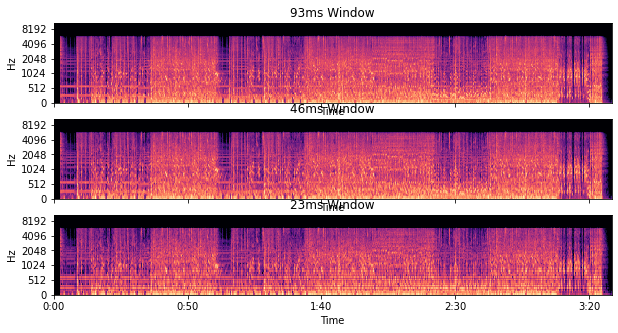

In [3]:
# Get the tensor from the notes
t = time.time()
notes_tensor = chart2tensor(chartpath)
music_tensor = music2tensor(songpath, display_spectrogram = True)
elapsed = time.time() - t

print('Getting notes and processing {} seconds of audio took'.format(music_tensor.shape[0]/100), elapsed, 'seconds')

In [4]:
# Append zeros to the end of the notes tensor so the music tensor and notes tensor match
num_zeros = music_tensor.shape[0] - notes_tensor.shape[0]

notes_tensor = np.append(notes_tensor, np.zeros(num_zeros))

In [5]:
print(music_tensor.shape)
print(notes_tensor.shape)

(20837, 3, 81, 15)
(20837,)


In [7]:
# Define path to preprocessed toy data
dump_path = Path.cwd().parent.joinpath('Preprocessed Toy Data')

# pickle.dump(music_tensor, open(dump_path.joinpath('music_tensor.p'), 'wb'))
# pickle.dump(notes_tensor, open(dump_path.joinpath('notes_tensor.p'), 'wb'))

In [8]:
np.save(dump_path.joinpath('music_tensor.npy'), music_tensor)
np.save(dump_path.joinpath('notes_tensor.npy'), notes_tensor)